In [43]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [44]:
data = pd.read_csv("/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/shopping_trends.csv")

df=data.copy()

##<font color="blue">Análisis Exploratorio de Datos (EDA)</font>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [46]:
#Normalizamos nombres de columnas, sin espacios antes o posteriores al nombre, reemplazo espacios por _ y todo escrito en minúsculas
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [47]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

In [48]:
df.shape

(3900, 19)

In [49]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
item_purchased,0
category,0
purchase_amount_(usd),0
location,0
size,0
color,0
season,0


In [50]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3895,False
3896,False
3897,False
3898,False


In [51]:
df.duplicated('customer_id').sum()

np.int64(0)

In [52]:
df.head()


,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount_(usd)     3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

In [54]:
df['discount_applied'].value_counts()

,count
discount_applied,
No,2223
Yes,1677


In [55]:
df['promo_code_used'].value_counts()

,count
promo_code_used,
No,2223
Yes,1677


# **Se detectó data leakage entre las variables discount_applied y promo_code_used, por lo que se eliminará discount_applied del conjunto de entrenamiento,antes de generar la exportación de la data limpia , al final**

In [56]:
(df['discount_applied'] == df['promo_code_used']).value_counts()
# son columnas identicas, esto afectaria a cualquier modelo de entrenamiento, por tanto borrare una de ellas

,count
True,3900


In [57]:
df['gender'].value_counts()

,count
gender,
Male,2652
Female,1248


In [58]:
df['subscription_status'].value_counts()

,count
subscription_status,
No,2847
Yes,1053


In [59]:
df['item_purchased'].value_counts()

,count
item_purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


In [60]:
df['category'].value_counts()

,count
category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [61]:
df['location'].value_counts()

,count
location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


In [62]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

In [63]:
# Cual es el comportamiento de compras de los clientes de acuerdo a su edad y genero?

df.groupby(['age',"gender"])['purchase_amount_(usd)'].agg(['mean','max', 'min']).round(2)

mean  max  min
age gender                 
18  Female  59.70  100   25
    Male    60.10  100   22
19  Female  62.04   97   23
    Male    60.48   98   22
20  Female  62.25   99   23
...           ...  ...  ...
68  Male    56.89  100   20
69  Female  63.84  100   20
    Male    61.71  100   21
70  Female  59.50   98   22
    Male    55.58   99   20

[106 rows x 3 columns]

In [64]:
# ¿Qué categorías se compran más por temporada?
df.groupby(['category',"season"]).size()

category     season
Accessories  Fall      324
             Spring    301
             Summer    312
             Winter    303
Clothing     Fall      427
             Spring    454
             Summer    408
             Winter    448
Footwear     Fall      136
             Spring    163
             Summer    160
             Winter    140
Outerwear    Fall       88
             Spring     81
             Summer     75
             Winter     80
dtype: int64

In [65]:
# ¿Qué métodos de pago se prefieren hombres y mujeres?
df.groupby(['gender',"preferred_payment_method"]).size()

gender  preferred_payment_method
Female  Bank Transfer               203
        Cash                        212
        Credit Card                 223
        Debit Card                  181
        PayPal                      221
        Venmo                       208
Male    Bank Transfer               409
        Cash                        458
        Credit Card                 448
        Debit Card                  455
        PayPal                      456
        Venmo                       426
dtype: int64

In [66]:
# ¿Qué tallas de ropa compran de acuerdo al genero?
df.groupby(['gender',"size"]).size()

gender  size
Female  L        337
        M        590
        S        187
        XL       134
Male    L        716
        M       1165
        S        476
        XL       295
dtype: int64

In [67]:
# ¿Qué typo de ropa compran de acuerdo al genero?
df.groupby(['gender',"color"]).size().unstack("gender")

gender,Female,Male
color,,
Beige,40,107
Black,54,113
Blue,52,100
Brown,46,95
Charcoal,50,103
Cyan,47,119
Gold,41,97
Gray,53,106
Green,56,113


In [68]:
# ¿Qué color de ropa compran de acuerdo al genero?
df.groupby(['gender',"item_purchased","size"]).size().unstack("gender")

gender               Female  Male
item_purchased size              
Backpack       L         10    25
               M         23    53
               S          1    17
               XL         3    11
Belt           L         13    26
...                     ...   ...
Sweater        XL         5    13
T-shirt        L          9    32
               M         27    39
               S          5    19
               XL         5    11

[100 rows x 2 columns]

In [69]:
df.drop(['customer_id'], axis=1).describe().T.round()

,count,mean,std,min,25%,50%,75%,max
age,3900.0,44.0,15.0,18.0,31.0,44.0,57.0,70.0
purchase_amount_(usd),3900.0,60.0,24.0,20.0,39.0,60.0,81.0,100.0
review_rating,3900.0,4.0,1.0,2.0,3.0,4.0,4.0,5.0
previous_purchases,3900.0,25.0,14.0,1.0,13.0,25.0,38.0,50.0


**Interpretación**

Age:  Edad del cliente, en un rango de 18 a 70 años
edad media de 44 años, muy significativo y real

El 25% de los clientes tienen menos de 31 años, y 25% tienen más de 57
Una desviación standard razonable.

In [70]:
# Visualización para UNIVARIADA para verificar outliers
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount_(usd)     3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

# Visualización univariada de las 4 features numéricas, para revisión de outliers, no se visualizan

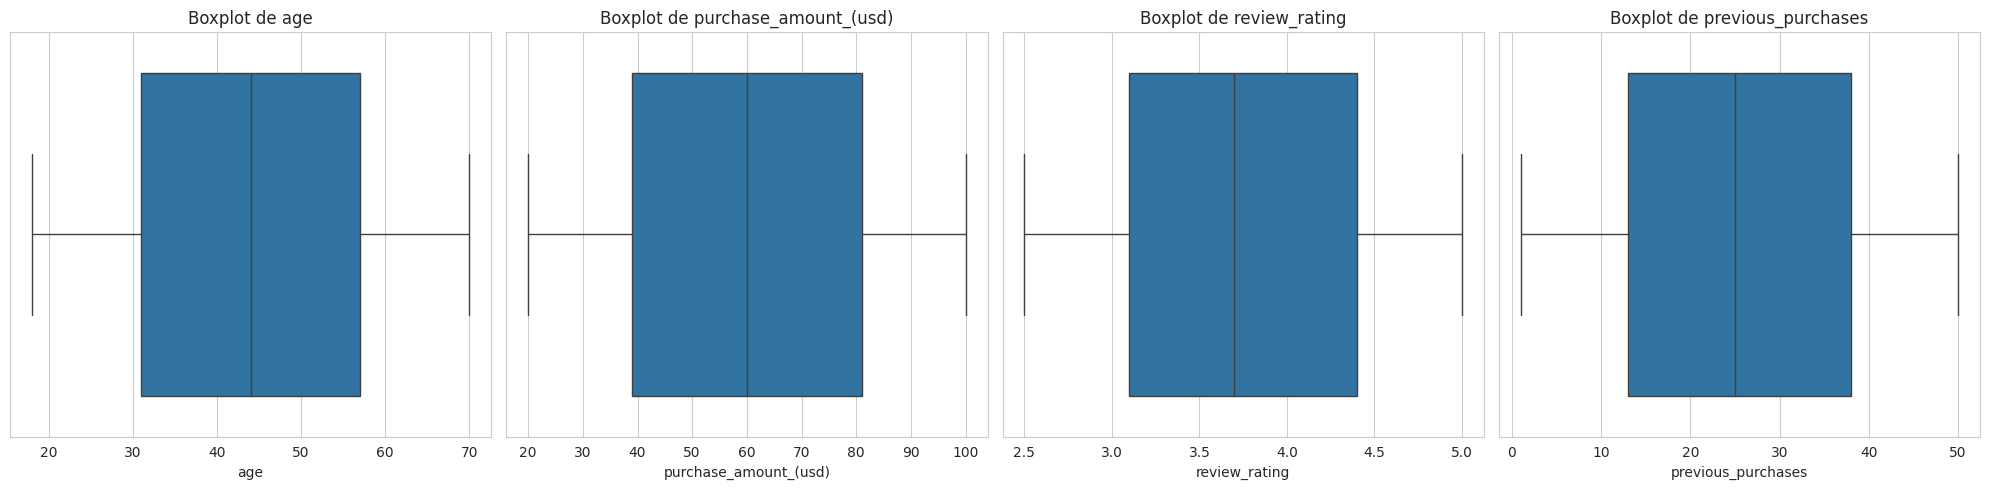

In [72]:

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Graficar cada boxplot manualmente en su respectivo eje
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Boxplot de age')

sns.boxplot(x=df['purchase_amount_(usd)'], ax=axes[1])
axes[1].set_title('Boxplot de purchase_amount_(usd)')

sns.boxplot(x=df['review_rating'], ax=axes[2])
axes[2].set_title('Boxplot de review_rating')

sns.boxplot(x=df['previous_purchases'], ax=axes[3])
axes[3].set_title('Boxplot de previous_purchases')

plt.tight_layout()
plt.show()

# **<font color="blue">Correlación de variables numéricas con heatmap</font>**

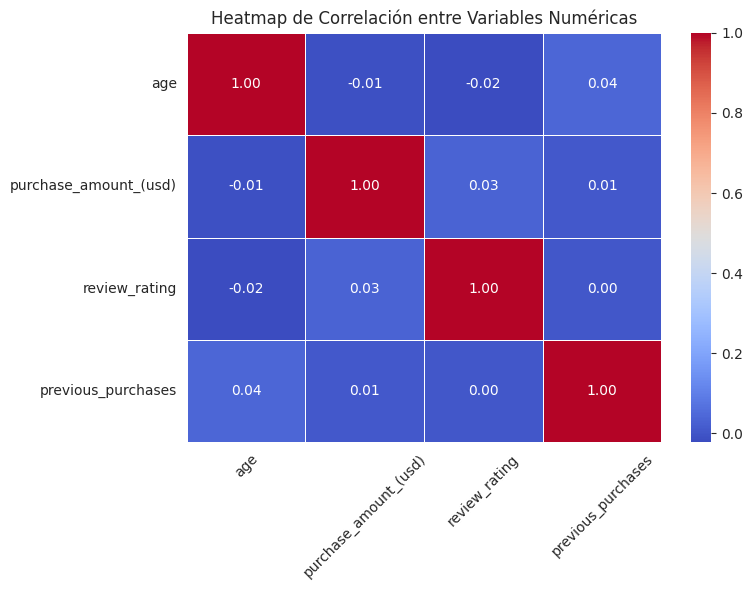

In [73]:

df_corr = df.drop(['customer_id'], axis=1)

# Calcular matriz de correlación solo para columnas numéricas
correlation_matrix = df_corr.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Títulos y etiquetas
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ***Todas las correlaciones están entre -0.02 y 0.04, lo que indica que ninguna variable tiene una relación lineal significativa con otra, por lo tanto para realizar ML, consideraré modelo no lineales como árboles, random forest,***

# <font color="tomato">**Exportación dataframe_limpio**</font>

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount_(usd)     3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

In [ ]:
df.drop(['customer_id'], axis=1, inplace=True)

In [76]:
df.drop(['discount_applied'], axis=1, inplace=True)

In [78]:
df.to_csv("/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/shopping_trends_limpio.csv", index=False)